###### <h1><center>Heart Attack Analysis & Prediction</center></h1>

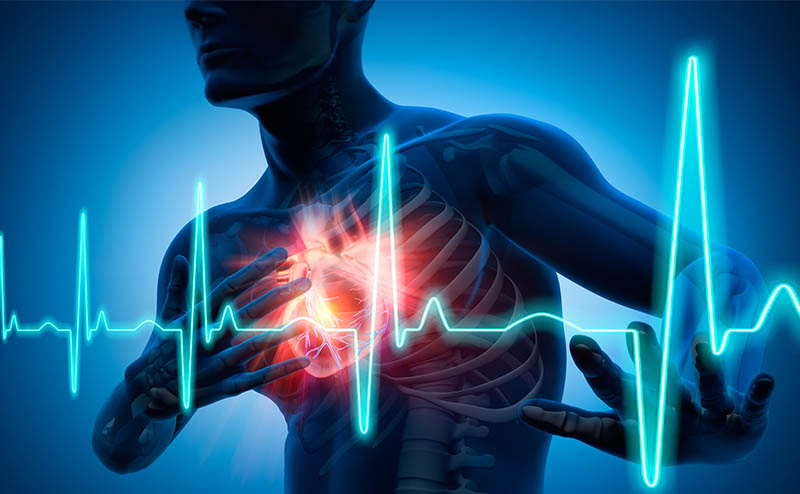

### 1. INTRODUCTION
#### 1.1 Data Description

Age : Age of the patient

Sex : Sex of the patient

cp : Chest Pain type

    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic
    
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : fasting blood sugar > 120 mg/dl

       1 = true
       0 = false

rest_ecg : resting electrocardiographic results

    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

exng: exercise induced angina 
    
      1 = yes 
      0 = no
      
old peak: ST depression induced by exercise relative to rest

slp: the slope of the peak exercise ST segment

       0 = unsloping
       1 = flat
       2 = downsloping

caa: number of major vessels (0-3)

thall : thalassemia
    
        0 = null
        1 = fixed defect
        2 = normal
        3 = reversable defect

target : diagnosis of heart disease (angiographic disease status)
        
        0= less chance of heart attack
        1= more chance of heart attack

#### 1.2 Objective
To predict if a person is vulnerable to heart attack or not

### 2. DATA QUALITY ASSESSMENT

#### 2.1 Importing Dependencies

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from collections import defaultdict
import math

import warnings 
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

print("Setup Complete")

#### 2.2 Reading Dataset

In [ ]:
# Reading dataset
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

df.head()

#### 2.3 Shape of Dataset

In [ ]:
print('The shape of dataset is : ', df.shape)

#### 2.4 Examining Data Types

In [ ]:
# Checking data-types of each feature
df.dtypes

#### 2.5 Unique Counts

In [ ]:
d = {}

# finding unique counts
for col in list(df.columns):
    
    d[col] = df[col].value_counts().shape[0]

# Converting dict to dataframe
pd.DataFrame(d, index=['Unique Counts']).transpose()

#### 2.6 Missing Values

In [ ]:
df.isna().sum()

##### Observations:
 - There are no NaN values in the data.

#### 2.7 Unique Values of each feature

In [ ]:
unique_val = defaultdict(list)

for col in df.columns:
    
    unique_val[col].append(list(df[col].unique()))
    
# Converting dict to dataframe
pd.DataFrame(unique_val, index=['Unique Values']).transpose()

##### Observations:
 - Some features can be considered as categorical features e.g. - sex, chest pain type, number of major vessels etc

In [ ]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

cont_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

target = ['output']

print('Categorical Features are : ', cat_features)

print('Continuous Features are : ', cont_features)

print('Target is : ', target)

#### 2.8 Summary Stats

In [ ]:
df.describe()

### 3. Exploratory Data Analysis(EDA)

#### 3.1 Univariate Analysis & Visualization

In [ ]:
class Plot:
    
    def __init__(self, fig, axes):
        
        plt.figure(figsize=(600,600))
        
        self.fig, self.axes = fig, axes
        
        self.i, self.j = 0, 0

    def count_plot(self, feat = None):
        
        if not feat:
            
            self.axes[self.i][self.j].set_xticklabels([])
            
            self.axes[self.i][self.j].set_yticklabels([])
            
            self.axes[self.i][self.j].text(0.5,0.5, 
                                            'COUNT PLOT\n FOR\n VARIOUS\n CATEGORICAL FEATURES', 
                                             horizontalalignment='center',
                                             verticalalignment='center',
                                             fontsize=18, fontweight='bold',
                                             fontfamily='serif',
                                             color="#000000")
            
        else:
        
            sns.countplot(x=df[feat], hue=df[feat], ax = self.axes[self.i][self.j],
                         dodge=False)
        
            self.axes[self.i][self.j].set_title(feat, fontsize=10)
            
            #self.axes[self.i][self.j].set_xticks()
        
        self.j += 1
        
        if self.j > 2:
            
            self.i += 1
            
            self.j = 0
            
    def box_plot(self, feat = None):
        
        if not feat:
            
            self.axes[self.i][self.j].set_xticklabels([])
            
            self.axes[self.i][self.j].set_yticklabels([])
            
            self.axes[self.i][self.j].text(0.5,0.5, 
                                            'BOX PLOT\n FOR\n VARIOUS\n CONTINUOUS FEATURES',
                                             horizontalalignment='center',
                                             verticalalignment='center',
                                             fontsize=18, fontweight='bold',
                                             fontfamily='serif',
                                             color="#000000")
        else:
        
            sns.boxplot(y=df[feat], width=0.6, ax = self.axes[self.i][self.j])
        
            self.axes[self.i][self.j].set_title(feat, fontsize=10)
        
        self.j += 1
        
        if self.j > 2:
            
            self.i += 1
            
            self.j = 0

In [ ]:
# Visulaizing categorical features
fig1, axes1 = plt.subplots(3, 3, figsize=(30, 25))

cplot = Plot(fig1, axes1)

# For heading
cplot.count_plot()

for feat in cat_features:
    
    cplot.count_plot(feat)

##### Observations:
 - Data contains twice the number of people with sex = 1 than sex = 0
 - More data available with fasting_blood_sugar <= 120 mg/dl
 - 33% people have exercise induced angina (pain in the chest that comes on with exercise)

In [ ]:
# Visulaizing Continuos Features
fig2, axes2 = plt.subplots(2, 3, figsize=(20, 15))

bplot = Plot(fig2, axes2)

bplot.box_plot()

for feat in cont_features:
    
    bplot.box_plot(feat)

In [ ]:
plt.figure(figsize=(100,100))

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].set_xticklabels([])
            
axes[0].set_yticklabels([])
            
axes[0].text(0.5,0.5, 'COUNT PLOT\n OF\n TARGET',horizontalalignment='center',verticalalignment='center',
                                             fontsize=18, fontweight='bold',
                                             fontfamily='serif',
                                             color="#000000")

sns.countplot(x=df[target[0]], hue=df[target[0]], dodge=False)

#### 3.2 Bivariate Analysis & Visualization

In [ ]:
fig = plt.figure(figsize=(15, 10))

df_corr = df[cont_features].corr().transpose()

mask = np.zeros_like(df_corr)

mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr, mask = mask, annot = True)

plt.title('Correlation Matrix', fontsize=22, fontweight='bold', 
          fontfamily='serif', color="#000000")

plt.show()

##### Observations:
 - There is no linear correlation between continuous variable according to the heatmap.

In [ ]:
# Distribution of continuous features
fig = plt.figure(figsize=(300, 300))

fig, axes = plt.subplots(2, 3, figsize=(20, 15))

i = 0

j = 1

axes[0][0].set_xticklabels([])

axes[0][0].set_yticklabels([])

axes[0][0].text(0.5,0.5, 'DISTRIBUTION\n OF\n VARIOUS\n CONTINUOS FEATURES \n ACCORDING TO \n TARGET VARIABLE',
      horizontalalignment='center',
      verticalalignment='center',
      fontsize=18, fontweight='bold',
      fontfamily='serif',
      color="#000000")


for feat in cont_features:
    
    sns.kdeplot(x= df[feat], hue=df[target[0]] ,ax = axes[i][j])
    
    j += 1
    
    if j > 2:
        
        i += 1
        
        j = 0

##### Observations:
 - As per the general observations in our day-to-day life, as the age increases there is more chances of heart attack, but it isn't the case according to the data.
 - According to data, there are more chances of attack if the cholestoral is between 200-300 mg/dl.
 - People with lower pevious peak achieved have higher chances of heart attack.
 - People with maximum heart rate achieved above 150 have higher chances of heart attack.

### 4. Build A Predictive Model 

#### 4.1 Importing necessary Libraries

In [ ]:
# Scaling
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Evaluation
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

print("Packages Imported....")

#### 4.2 Scaling & Encoding

In [ ]:
# Creating copy of dataframe
df_copy = df

# Encoding categorical features
df_copy = pd.get_dummies(df_copy, columns = cat_features, drop_first = True)

df_copy.columns

In [ ]:
X = df_copy.drop(['output'], axis= 1)

Y = df_copy[['output']]

rb_sc = RobustScaler()

X[cont_features] = rb_sc.fit_transform(X[cont_features])

X.head()

#### 4.3 Splitting the dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, 
                                                    random_state = 42)

#### 4.4 Predictive Model

In [ ]:
# <<<< SVM >>>>

model1 = SVC(kernel='linear', random_state = 42)

model1.fit(x_train, y_train.values.ravel())

y_pred = model1.predict(x_test)

acc_m1 = accuracy_score(y_test, y_pred) * 100

print(accuracy_score(y_test, y_pred))

In [ ]:
# <<<< Logistic Regression >>>>

model2 = LogisticRegression()

model2.fit(x_train, y_train.values.ravel())

y_pred = model2.predict(x_test)

acc_m2 = accuracy_score(y_test, y_pred) * 100

print(accuracy_score(y_test, y_pred))

In [ ]:
# <<<< DecisionTree >>>>

model3 = DecisionTreeClassifier()

model3.fit(x_train, y_train)

y_pred = model3.predict(x_test)

acc_m3 = accuracy_score(y_test, y_pred) * 100

print(accuracy_score(y_test, y_pred))

In [ ]:
# <<<< RandomForest >>>>

model4 = RandomForestClassifier()

model4.fit(x_train, y_train.values.ravel())

y_pred = model4.predict(x_test)

acc_m4 = accuracy_score(y_test, y_pred) * 100

print(accuracy_score(y_test, y_pred))

In [ ]:
# <<<< GradientBoosting >>>>

model5 = GradientBoostingClassifier()

model5.fit(x_train, y_train.values.ravel())

y_pred = model5.predict(x_test)

acc_m5 = accuracy_score(y_test, y_pred) * 100

print(accuracy_score(y_test, y_pred))

In [ ]:
# <<<< Hyperparameter tuning on SVM >>>>

model6 = SVC()

parameters = {"C":np.arange(1,10,1),
              'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,
                       0.1,0.5,1,5]}

searcher = GridSearchCV(model6, parameters)

# fitting the object
searcher.fit(x_train, y_train.values.ravel())

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

y_pred = searcher.predict(x_test)

acc_m6 = accuracy_score(y_test, y_pred) * 100

print("The test accuracy score of SVM after hyper-parameter tuning is", accuracy_score(y_test, y_pred))

#### 4.5 Visualizing Accuracies

In [ ]:
names = ['SVM','LR','DT','RF','GB', 'SVM(PARAMETERIZED)']

values = [acc_m1, acc_m2, acc_m3, acc_m4, acc_m5, acc_m6]

f = plt.figure(figsize=(30,7), num=10)

plt.subplot(131)

plt.ylim(50,102)

plt.bar(names,values)